In [1]:
import No_ML as nml
import ML_method as mlm
import matplotlib.pyplot as plt
import numpy as np
from  matplotlib.colors import LogNorm

# I. Scaling

In [2]:
cwt = np.genfromtxt('demo_files/demo-cwt-1_5.csv', delimiter=",", dtype=float)
freq = np.genfromtxt('demo_files/demo-freq-1_5.csv', delimiter=",", dtype=float)
fnorm = np.linspace(0, 10, 200)

In [3]:
f0 = 3.5491552309492658 #3.5491552309492658 # initial frequency (Hz)
fend = 84.26856349358127 # final frequency (Hz)
fs = 1109.878 # sampling frequency

Npoint=len(cwt[0])
Tsimul=(Npoint-1)/fs
T=np.linspace(0,Tsimul,Npoint)

Text(0.5, 1.0, 'Unscaled scalogram: 1:5')

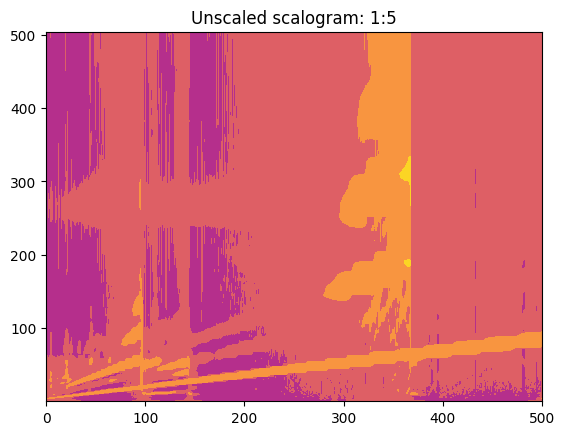

In [4]:
plt.contourf(T,freq,cwt, cmap="plasma", norm=LogNorm())
plt.title("Unscaled scalogram: 1:5")

Text(0.5, 1.0, 'Scaled scalogram: 1:5')

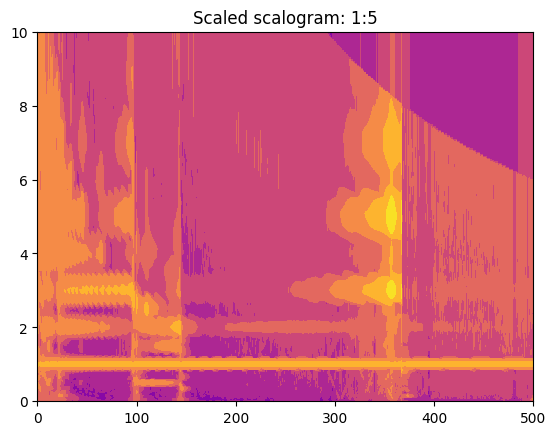

In [5]:
scaled_coef = nml.scale(cwt, freq, f0, fend)
plt.contourf(T,fnorm,scaled_coef, cmap="plasma", norm=LogNorm())
plt.title("Scaled scalogram: 1:5")

# II. Comparison between ML and not ML methods

In [6]:
cwt = np.genfromtxt('demo_files/demo-cwt-1_3.csv', delimiter=",", dtype=float)
freq = np.genfromtxt('demo_files/demo-freq-1_3.csv', delimiter=",", dtype=float)
f0 = 60/2/np.pi #3.5491552309492658 # initial frequency (Hz)
fend = 19.4646495401388 # final frequency (Hz)
fs = 516.54 # sampling frequency

Npoint=len(cwt[0])
Tsimul=(Npoint-1)/fs
T=np.linspace(0,Tsimul,Npoint)

Text(0.5, 1.0, 'Scaled scalogram: 1:3')

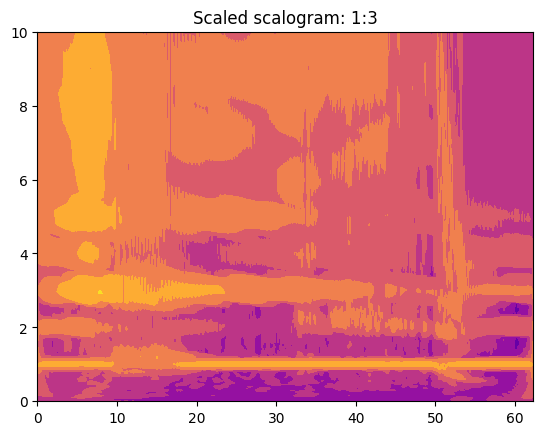

In [7]:
scaled_coef2 = nml.scale(cwt, freq, f0, fend)
plt.contourf(T,fnorm,scaled_coef2, cmap="plasma", norm=LogNorm())
plt.title("Scaled scalogram: 1:3")

In [8]:
#imports
S1M1 = mlm.interaction(scaled_coef)
S1M2 = nml.interaction2(scaled_coef)
S2M1 = mlm.interaction(scaled_coef2)
S2M2 = nml.interaction2(scaled_coef2)
Sets=[S1M1,S1M2,S2M1,S2M2]

In [9]:
data=np.zeros((4,4))
for i in range(4):
    set=Sets[i]
    l=[set[2],set[3],set[4],set[5]]
    data[:,i]=l

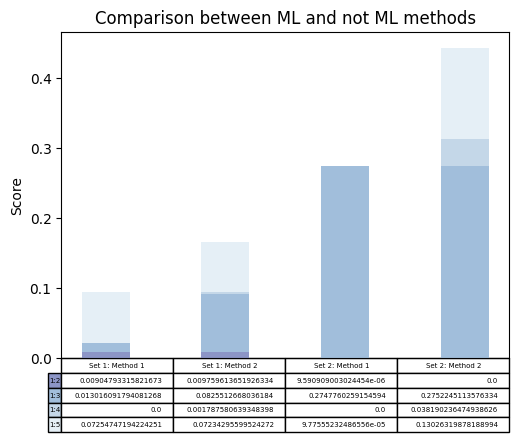

In [10]:
columns = ('Set 1: Method 1', 'Set 1: Method 2', 'Set 2: Method 1', 'Set 2: Method 2')
rows = ["1:2","1:3","1:4","1:5"]

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0.5, 0.1, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
#cell_text.reverse()
#data.reverse()
#colors = colors[::-1]

# Add a table at the bottom of the axes
the_table = plt.table(cellText=data,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Score")
plt.xticks([])
plt.title('Comparison between ML and not ML methods')

plt.show()

## III. Changing the threshhold

In [11]:
mod = model(5)
interaction(scalogram, model=mod, scaled=True, frequencies=None, f0=None, fend=None)

NameError: name 'model' is not defined

# IV. Crossvalidation

In [ ]:
Cross_validate(model, X, y, k=5)